In [19]:
import networkx as nx
from similarity_measures import simplified_dmeasure as dm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
import os
from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings('ignore')

In [3]:
base_path = '/Users/ahmet/Desktop/Study/second_semester/ds_project/BSNIP/pconn'

In [4]:
pconn_paths = os.listdir('/Users/ahmet/Desktop/Study/second_semester/ds_project/BSNIP/pconn')

In [5]:
session_ids = [path.split('.')[0] for path in pconn_paths]

In [8]:
def read_behavior(path):
    # Reading
    behavior_path = path
    
    behavior_files = os.listdir(behavior_path)
    
    behavior_source = pd.read_csv(behavior_path+behavior_files[0], sep='\t')
    for behavior_file in behavior_files[1:]:
        curr_behavior_source = pd.read_csv(behavior_path+behavior_file, sep='\t')
        behavior_source = pd.concat([behavior_source, curr_behavior_source], axis=0)

    return behavior_source

In [14]:
behavior_df = read_behavior('/Users/ahmet/Desktop/Study/second_semester/ds_project/behavior/')

In [15]:
behavior_df

,session_id,Group,BACS_Dig_Seq_z,BACS_Sym_Cod_z,BACS_Tok_Mot_z,BACS_Tower_z,BACS_Verb_Flu_z,BACS_Verb_Mem_z,PANSS_p1,PANSS_p2,...,PANSS_g7,PANSS_g8,PANSS_g9,PANSS_g10,PANSS_g11,PANSS_g12,PANSS_g13,PANSS_g14,PANSS_g15,PANSS_g16
0,S9872THQ1,CON,-1.029762,-0.033421,-2.678832,0.077206,-0.515179,-1.722595,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S7601YAH1,SADP,-0.136905,-1.000880,-2.313869,0.077206,0.128795,-0.380313,2.0,1.0,...,4.0,1.0,2.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0
0,S3478UPA1,CON,-1.922619,-0.912929,-2.313869,-1.761029,-1.067157,-2.058166,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S8036VCK3,BPP,-1.070388,-0.250962,-0.423391,-0.330508,-0.924242,-1.554610,3.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
0,S9134FMR1,BPP,0.143204,-0.924038,-2.055304,-0.754237,0.496212,0.289362,3.0,2.0,...,1.0,1.0,1.0,2.0,3.0,1.0,3.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,S8320GAY1,CON,0.871359,1.191346,-2.055304,1.788136,0.117424,0.714894,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S3084TET1,BPP,-0.099515,-1.500962,0.301904,-0.330508,0.875000,-0.703546,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S4885JYP1,CON,-1.378151,-0.143236,-1.285204,-0.079002,0.066210,-2.262394,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S7110LVJ1,CON,1.142857,1.536693,0.144389,1.168399,0.370624,1.002418,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
# stratified sampling from each group
sample_df = behavior_df.groupby('Group', group_keys=False).apply(lambda x: x.sample(5))
sample_df

,session_id,Group,BACS_Dig_Seq_z,BACS_Sym_Cod_z,BACS_Tok_Mot_z,BACS_Tower_z,BACS_Verb_Flu_z,BACS_Verb_Mem_z,PANSS_p1,PANSS_p2,...,PANSS_g7,PANSS_g8,PANSS_g9,PANSS_g10,PANSS_g11,PANSS_g12,PANSS_g13,PANSS_g14,PANSS_g15,PANSS_g16
0,S6736OPJ1,BPP,-1.029762,1.109938,0.058394,0.077206,-2.079117,-0.044743,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S4387OIK1,BPP,-2.815476,-2.144239,-2.496350,-1.761029,-0.791168,-2.729306,2.0,2.0,...,1.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0
0,S1295TEN1,BPP,-2.041262,-0.731731,-1.601995,-1.177966,0.022727,-0.419858,1.0,1.0,...,1.0,3.0,1.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0
0,S0156HTH1,BPP,0.871359,-0.731731,-0.242067,-0.330508,1.348485,0.714894,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,3.0
0,S4212YWV1,BPP,0.458333,-1.616535,-3.226277,-0.410901,1.324747,0.738255,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S1808FGA1,CON,-3.899160,-2.088417,-0.427448,-1.118503,-2.369102,-2.383313,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S9665DQY1,CON,0.582633,1.183024,0.287348,0.544699,0.446728,-0.811366,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S5417NYT1,CON,0.547120,-0.103199,-1.157783,0.749280,0.196380,0.894608,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S4170MOW2,CON,-0.584951,0.229808,-1.511333,0.093220,2.390152,-1.412766,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0,S0642HEM1,CON,-1.327381,0.670185,0.788321,-0.658088,-0.239190,0.626398,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
sample_session_ids = sample_df['session_id'].to_list()

In [43]:
def dists(Gs, measure):
    
    Ds = [[0] * len(Gs) for _ in range(len(Gs))]

    for i in range(len(Gs)):
        for j in range(i, len(Gs)):
            Ds[i][j] = measure(Gs[i], Gs[j])
            Ds[j][i] = Ds[i][j]

    return Ds


def build_network(data, df, visualize = True):
    # Create a graph from the data
    # This example assumes 'data' is a square matrix where data[i][j] represents the connection
    # strength between region i and region j. Your data's structure may vary.
    G = nx.Graph()
    
    # Add nodes with the brain region names or indices if you don't have names
    num_regions = data.shape[0]
    G.add_nodes_from(range(num_regions))
    
    # Add edges based on connectivity data
    # Here we're simply adding an edge for every non-zero connection
    for i in range(num_regions):
        # Calculate the standard deviation of the specified row
        std_dev = df.iloc[i].std()
        threshold = 2*std_dev
        for j in range(i+1, num_regions):  # Ensure i < j to avoid duplicating edges
            if abs(data[i, j]) > threshold:  # Assuming 0 means no connection
                G.add_edge(i, j, weight=data[i, j])
    
    if visualize:
        # You can also visualize the graph using matplotlib or similar libraries
        # This step requires matplotlib to be installed (`pip install matplotlib`)
        nx.draw(G, with_labels=True)
        plt.show()
        
    return G

def read_pconn(path):
    
    # Load the .pconn.nii file
    img = nib.load(path)
    
    # Extract the data array from the image
    # The data might need to be processed or reshaped depending on its structure
    data = img.get_fdata()

    df = pd.DataFrame(data)
    
    return data, df

def map(Gs, Ds, title, labels):
    fig = plt.figure()

    plt.imshow(Ds, cmap=LinearSegmentedColormap.from_list(
        '', ['yellow', 'gray', 'white']))

    for i in range(len(Gs)):
        for j in range(len(Gs)):
            plt.text(j, i, "{:.2f}".format(
                Ds[i][j]), ha='center', va='center', fontsize=4)

    plt.title(title)
    plt.xticks(ticks=[])
    plt.yticks(ticks=range(len(Gs)), labels=[label for label in labels], fontsize=7)

    # Adding horizontal and vertical lines every 5 labels
    for i in range(0, len(Gs), 5):
        plt.axhline(i - 0.5, color='red', linewidth=1)  # horizontal line
        plt.axvline(i - 0.5, color='red', linewidth=1)  # vertical line

    clb = plt.colorbar()
    clb.ax.tick_params(labelsize=7)

    fig.savefig(title + ".pdf", bbox_inches='tight')
    plt.show()
    plt.close(fig)

In [29]:
Gs = []
for session_id, pconn_path in zip(session_ids, pconn_paths):
    if session_id in sample_session_ids:
        path = os.path.join(base_path, pconn_path)
        data, df = read_pconn(path)
        G = build_network(data, df, visualize = False)
        Gs.append(G)
    else:
        pass

In [30]:
Ds = dists(Gs, dm.dmeasure)

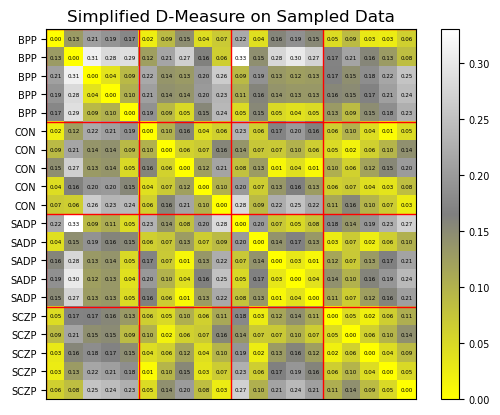

In [44]:
map(Gs, Ds, 'Simplified D-Measure on Sampled Data', sample_df['Group'].values)